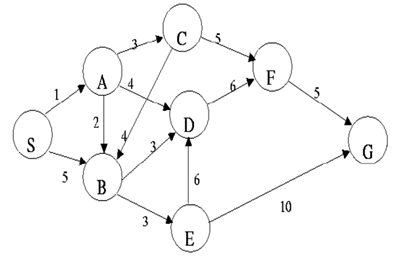

In the above graph, the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Call **UCS**, **GBF** and  **A star** for this graph. Also insert the drawing of simulations one by one.

In [ ]:
example1 = {'S':{'A':1,'B':5},
            'A':{'B':2,'C':3,'D':4},
            'B':{'D':3,'E':3},
            'C':{'B':4,'F':5},
            'D':{'F':6},
            'E':{'D':6,'G':10},
            'F':{'G':5},
            'G':{}
            }

# Uniform Cost Search

In [ ]:
from queue import PriorityQueue
def ucs(start, goal, G):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((0, [start]))

    print(f'{start}: 0')
    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # selceting the node
        ucost, upath = pq.get() # select a node for expansion
        u = upath[-1]

        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')

              for node in upath: print(node,end='-')
              print(f'{v}:{vcost}')

              pq.put((vcost,vpath))# store the generated node in the frontier

    print('Failed')

In [ ]:
ucs('S', 'G', example1)

S: 0
S is selected. Expanded list: S
S-A:1
S-B:5
S-A is selected. Expanded list: S,A
S-A-B:3
S-A-C:4
S-A-D:5
S-A-B is selected. Expanded list: S,A,B
S-A-B-D:6
S-A-B-E:6
S-A-C is selected. Expanded list: S,A,B,C
S-A-C-F:9
S-A-D is selected. Expanded list: S,A,B,C,D
S-A-D-F:11
S-B is selected. S-A-B-D is selected. S-A-B-E is selected. Expanded list: S,A,B,C,D,E
S-A-B-E-G:16
S-A-C-F is selected. Expanded list: S,A,B,C,D,E,F
S-A-C-F-G:14
S-A-D-F is selected. S-A-C-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'A', 'C', 'F', 'G'], 14)

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

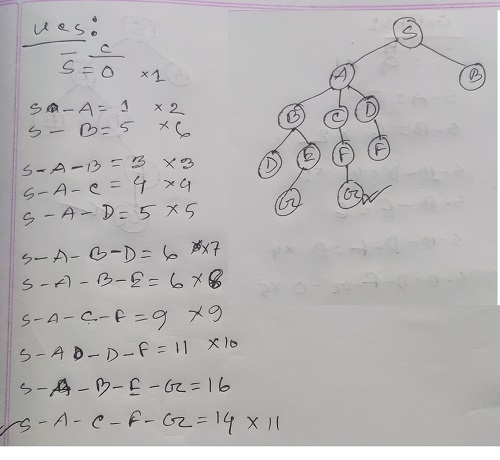

# Greedy Best First Search

In [ ]:
from queue import PriorityQueue
def gbfs(start, goal, G, her):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((her[start], [start], 0))

    print(f'{start}: 0')
    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # selceting the node
        _ , upath, ucost = pq.get() # select a node for expansion
        u = upath[-1]

        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')

              for node in upath: print(node,end='-')
              print(f'{v}:{vcost}, h={her[v]}')

              pq.put((her[v],vpath,vcost))# store the generated node in the frontier

    print('Failed')

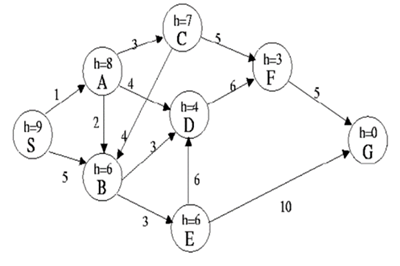

In [ ]:
example1_h = {'S':9,'A':8,'B':6,'C':7,'D':4,'E':6,'F':3,'G':0}
gbfs('S', 'G', example1, example1_h)

S: 0
S is selected. Expanded list: S
S-A:1, h=8
S-B:5, h=6
S-B is selected. Expanded list: S,B
S-B-D:8, h=4
S-B-E:8, h=6
S-B-D is selected. Expanded list: S,B,D
S-B-D-F:14, h=3
S-B-D-F is selected. Expanded list: S,B,D,F
S-B-D-F-G:19, h=0
S-B-D-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'B', 'D', 'F', 'G'], 19)

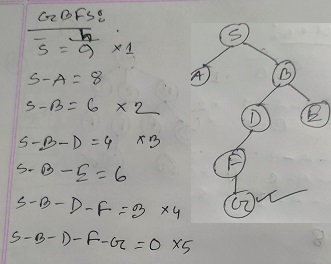Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# A*

In [ ]:
# code A* here
from queue import PriorityQueue
def A(start, goal, G, her):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((her[start], [start], 0))

    print(f'{start}: 0')
    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # selceting the node
        _ , upath, ucost = pq.get() # select a node for expansion
        u = upath[-1]

        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')

              for node in upath: print(node,end='-')
              print(f'{v}:{vcost}, h+c={her[v]+vcost}')

              pq.put((her[v]+vcost,vpath,vcost))# store the generated node in the frontier

    print('Failed')
A('S', 'G', example1, example1_h)

S: 0
S is selected. Expanded list: S
S-A:1, h+c=9
S-B:5, h+c=11
S-A is selected. Expanded list: S,A
S-A-B:3, h+c=9
S-A-C:4, h+c=11
S-A-D:5, h+c=9
S-A-B is selected. Expanded list: S,A,B
S-A-B-D:6, h+c=10
S-A-B-E:6, h+c=12
S-A-D is selected. Expanded list: S,A,B,D
S-A-D-F:11, h+c=14
S-A-B-D is selected. S-A-C is selected. Expanded list: S,A,B,D,C
S-A-C-F:9, h+c=12
S-B is selected. S-A-B-E is selected. Expanded list: S,A,B,D,C,E
S-A-B-E-G:16, h+c=16
S-A-C-F is selected. Expanded list: S,A,B,D,C,E,F
S-A-C-F-G:14, h+c=14
S-A-C-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'A', 'C', 'F', 'G'], 14)

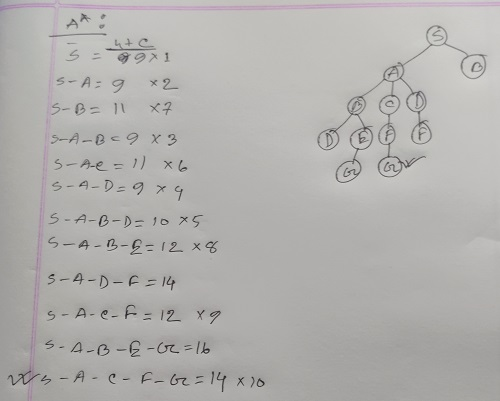

In [ ]:
# Call A* here for the map

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# Another Example

**Arad --> Bucharest**

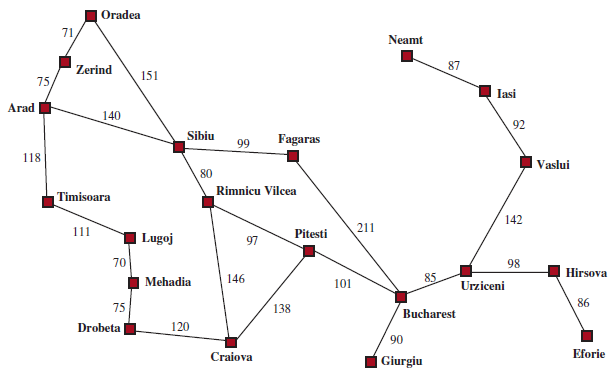

In [ ]:
romanian_map = {
    'Arad': { 'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
h_rm = {'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253,
    'Timisoara': 329, 'Lugoj': 244, 'Mehadia': 241,
    'Drobeta': 242, 'Craiova': 160, 'Rimnicu': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0,
    'Giurgiu': 77, 'Urziceni': 80, 'Hirsova': 151,
    'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234}

In [ ]:
# call UCS for the above graph here

ucs('Arad', 'Bucharest', romanian_map)

Arad: 0
Arad is selected. Expanded list: Arad
Arad-Zerind:75
Arad-Timisoara:118
Arad-Sibiu:140
Arad-Zerind is selected. Expanded list: Arad,Zerind
Arad-Zerind-Oradea:146
Arad-Timisoara is selected. Expanded list: Arad,Zerind,Timisoara
Arad-Timisoara-Lugoj:229
Arad-Sibiu is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu
Arad-Sibiu-Oradea:291
Arad-Sibiu-Fagaras:239
Arad-Sibiu-Rimnicu:220
Arad-Zerind-Oradea is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea
Arad-Sibiu-Rimnicu is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea,Rimnicu
Arad-Sibiu-Rimnicu-Craiova:366
Arad-Sibiu-Rimnicu-Pitesti:317
Arad-Timisoara-Lugoj is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea,Rimnicu,Lugoj
Arad-Timisoara-Lugoj-Mehadia:299
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea,Rimnicu,Lugoj,Fagaras
Arad-Sibiu-Fagaras-Bucharest:450
Arad-Sibiu-Oradea is selected. Arad-Timisoara-Lugoj-Mehadia is selected. Expanded list: Arad,Zerind,Tim

(['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

In [ ]:
# call GBFS for the above graph here
gbfs('Arad', 'Bucharest', romanian_map, h_rm)

Arad: 0
Arad is selected. Expanded list: Arad
Arad-Zerind:75, h=374
Arad-Timisoara:118, h=329
Arad-Sibiu:140, h=253
Arad-Sibiu is selected. Expanded list: Arad,Sibiu
Arad-Sibiu-Oradea:291, h=380
Arad-Sibiu-Fagaras:239, h=176
Arad-Sibiu-Rimnicu:220, h=193
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Sibiu,Fagaras
Arad-Sibiu-Fagaras-Bucharest:450, h=0
Arad-Sibiu-Fagaras-Bucharest is selected. Bucharest is SELECTED and Goal test is satisfied.


(['Arad', 'Sibiu', 'Fagaras', 'Bucharest'], 450)

Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

In [ ]:
# call A* for the above graph here
A('Arad', 'Bucharest', romanian_map, h_rm)

Arad: 0
Arad is selected. Expanded list: Arad
Arad-Zerind:75, h+c=449
Arad-Timisoara:118, h+c=447
Arad-Sibiu:140, h+c=393
Arad-Sibiu is selected. Expanded list: Arad,Sibiu
Arad-Sibiu-Oradea:291, h+c=671
Arad-Sibiu-Fagaras:239, h+c=415
Arad-Sibiu-Rimnicu:220, h+c=413
Arad-Sibiu-Rimnicu is selected. Expanded list: Arad,Sibiu,Rimnicu
Arad-Sibiu-Rimnicu-Craiova:366, h+c=526
Arad-Sibiu-Rimnicu-Pitesti:317, h+c=417
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Sibiu,Rimnicu,Fagaras
Arad-Sibiu-Fagaras-Bucharest:450, h+c=450
Arad-Sibiu-Rimnicu-Pitesti is selected. Expanded list: Arad,Sibiu,Rimnicu,Fagaras,Pitesti
Arad-Sibiu-Rimnicu-Pitesti-Craiova:455, h+c=615
Arad-Sibiu-Rimnicu-Pitesti-Bucharest:418, h+c=418
Arad-Sibiu-Rimnicu-Pitesti-Bucharest is selected. Bucharest is SELECTED and Goal test is satisfied.


(['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'], 418)

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

# New Exercise